Graphical results notebook for matrix multiplication benchmarking in Python using mlx, numpy, and pure python implementations.

In [25]:
from multiply.benchmark import benchmark_range, benchmark
from multiply.payloads import multiply_at_size

In [15]:
import numpy as np
def multiply_mlx_at_size(size): return multiply_at_size(size, 'mlx')
def multiply_numpy_at_size(size): return multiply_at_size(size, 'numpy')
def multiply_python_at_size(size): return multiply_at_size(size, 'python')

mlx_data = benchmark_range(multiply_mlx_at_size, 2**np.arange(1, 15, 0.5))


/Users/jamespjh/devel/stubs/languages/python/multiply/venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2599: RuntimeWarning: divide by zero encountered in <lambda> (vectorized)
  outputs = ufunc(*args, out=...)


In [18]:
numpy_data = benchmark_range(multiply_numpy_at_size, 2**np.arange(1, 13, 0.5))


In [22]:
python_data = benchmark_range(multiply_python_at_size, 2**np.arange(1, 9, 0.5))

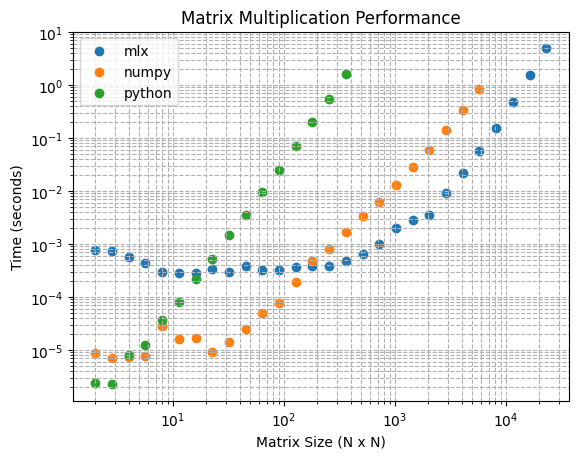

In [24]:
import matplotlib.pyplot as plt
plt.scatter(*mlx_data, label='mlx')
plt.scatter(*numpy_data, label='numpy')
plt.scatter(*python_data, label='python')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Performance')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

In [ ]:

#Model the data as a power law if above a threshold, otherwise a constant
def model_function(x, a, b, c):
    return np.where(x > c, a * x ** b, a* c ** b)

from scipy.optimize import curve_fit


Fitted model parameters: a=8.066690107605692e-15, b=3.386988613827858, c=1661.8402669854402


In [40]:
mlx_params, _ = curve_fit(model_function, *mlx_data, p0 = [0, 3, 1000])
print(f"Fitted model (MLX) parameters: a={mlx_params[0]}, b={mlx_params[1]}, c={mlx_params[2]}")

Fitted model (MLX) parameters: a=8.06669002933556e-15, b=3.386988614796757, c=1661.8402696098037


In [48]:
python_params, _ = curve_fit(model_function, *python_data, p0 = [2e-8, 3, 2])
print(f"Fitted model (Python) parameters: a={python_params[0]}, b={python_params[1]}, c={python_params[2]}")

Fitted model (Python) parameters: a=2.4452304749080655e-08, b=3.0558986766766254, c=6.1620552797923205


In [49]:
numpy_params, _ = curve_fit(model_function, *numpy_data, p0 = [0, 3, 1000])
print(f"Fitted model (Numpy) parameters: a={numpy_params[0]}, b={numpy_params[1]}, c={numpy_params[2]}")

Fitted model (Numpy) parameters: a=1.78148607715901e-10, b=2.5695325916000167, c=96.22213985741672


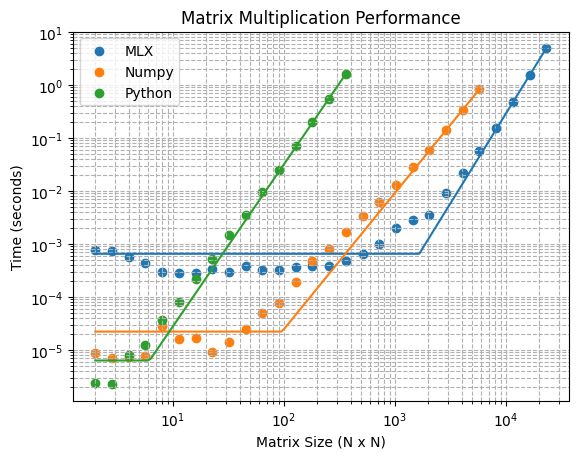

In [50]:
# Plot with a fit

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Matrix Size (N)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Time vs Size')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Performance')
plt.grid(True, which="both", ls="--")

def plot_with_fit(data, model, fit, label):
    x_fit = np.linspace(data[0].min(), data[0].max(), 1000)
    y_fit = model(x_fit, *fit)
    plt.scatter(*data, marker='o', label=label)
    plt.plot(x_fit, y_fit)


plot_with_fit(mlx_data, model_function, mlx_params, "MLX")
plot_with_fit(numpy_data, model_function, numpy_params, "Numpy")
plot_with_fit(python_data, model_function, python_params, "Python")
plt.legend()
plt.show()